In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [ ]:
#!kaggle datasets download -d benroshan/factors-affecting-campus-placement

In [13]:
zip = ZipFile('./factors-affecting-campus-placement.zip')
zip.extractall()

In [14]:
data = pd.read_csv("./Placement_Data_Full_Class.csv")

In [15]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [17]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [18]:
#setting sl_no as index
data = data.set_index('sl_no')

In [19]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [20]:
#identifying unique values 
print(data['gender'].unique())
print(data['ssc_b'].unique())
print(data['hsc_s'].unique())
print(data['degree_t'].unique())
print(data['specialisation'].unique())

['M' 'F']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']


In [21]:
data['gender']=data['gender'].astype('category')
data['status']=data['status'].astype('category')
data['workex']=data['workex'].astype('category')
data['hsc_b']=data['hsc_b'].astype('category')
data['ssc_b']=data['ssc_b'].astype('category')
data['specialisation']=data['specialisation'].astype('category')
data['degree_t']=data['degree_t'].astype('category')
data['hsc_s']=data['hsc_s'].astype('category')

In [22]:
data.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [23]:
data.dtypes

gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
salary             float64
dtype: object

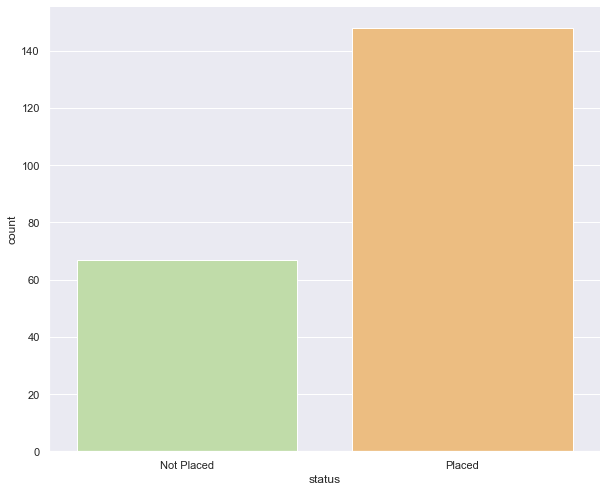

In [24]:
#Placement status
sns.set(style="darkgrid")
sns.catplot(x = 'status', data=data, kind='count',height=7,aspect=1.2, palette = 'Spectral_r')

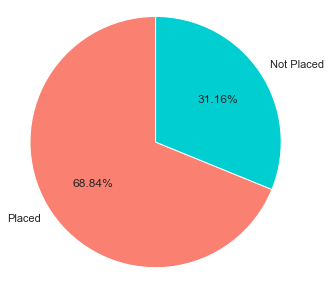

In [25]:
labels = ['Placed', 'Not Placed']
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(data.status.value_counts(normalize=True), labels=labels, autopct='%2.2f%%', startangle=90, colors = ['salmon', 'darkturquoise'] )
ax.axis('equal')
plt.show()

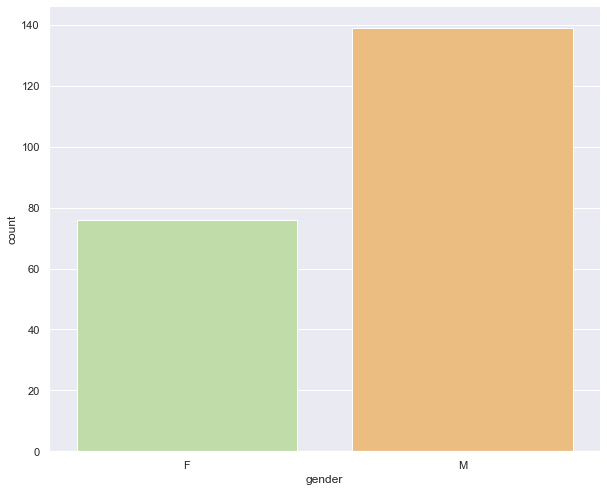

In [26]:
#Male:Female
sns.set(style="darkgrid")
sns.catplot(x = 'gender', data=data, kind='count',height=7, aspect = 1.2, palette = 'Spectral_r')

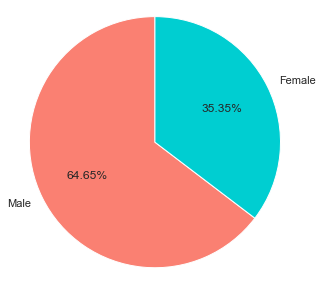

In [27]:
labels = ['Male', 'Female']
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(data.gender.value_counts(normalize=True), labels=labels, autopct='%2.2f%%', startangle=90, colors = ['salmon', 'darkturquoise'] )
ax.axis('equal')
plt.show()

In [28]:
#placements based on gender
status_gender = data.groupby('status')
status_gender.gender.value_counts()

status      gender
Not Placed  M          39
            F          28
Placed      M         100
            F          48
Name: gender, dtype: int64

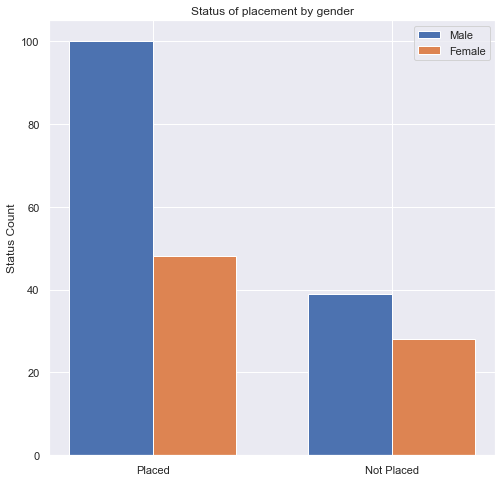

In [29]:
labels = ['Placed', 'Not Placed']
M = [100, 39]
F = [48, 28]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (8,8))
rects1 = ax.bar(x - width/2, M, width, label='Male')
rects2 = ax.bar(x + width/2, F, width, label='Female')
ax.set_ylabel('Status Count')
ax.set_title('Status of placement by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

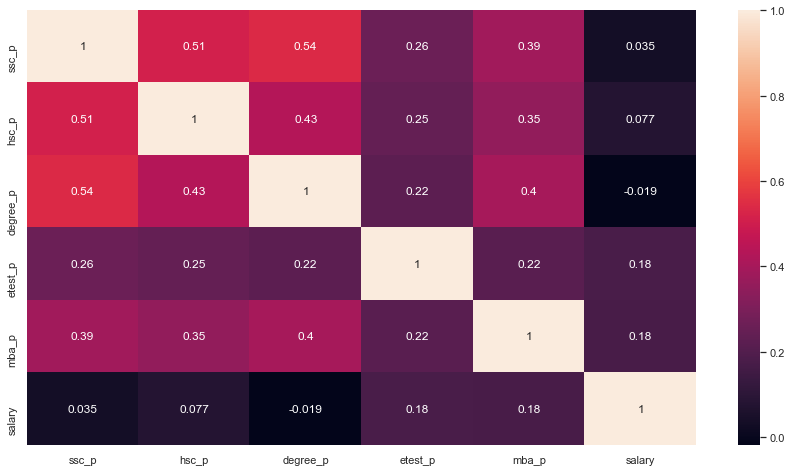

In [30]:
#correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)

In [31]:
#correlation of degree percentages to placement
data['status_cat'] = list(map(lambda x : 1 if x == 'Placed' else 0, data['status']))

print('placement status against Secondary Education: ', data['status_cat'].corr(data['ssc_p']))
print('placement status against Higher Secondary Education: ',data['status_cat'].corr(data['hsc_p']))
print('placement status against Degree: ',data['status_cat'].corr(data['degree_p']))
print('placement status against Employability Test: ',data['status_cat'].corr(data['etest_p']))
print('placement status against Post Grad Degree: ',data['status_cat'].corr(data['mba_p']))


placement status against Secondary Education:  0.6078887335215237
placement status against Higher Secondary Education:  0.4912279444941069
placement status against Degree:  0.4798609925300059
placement status against Employability Test:  0.1276393747616237
placement status against Post Grad Degree:  0.07692164904759446


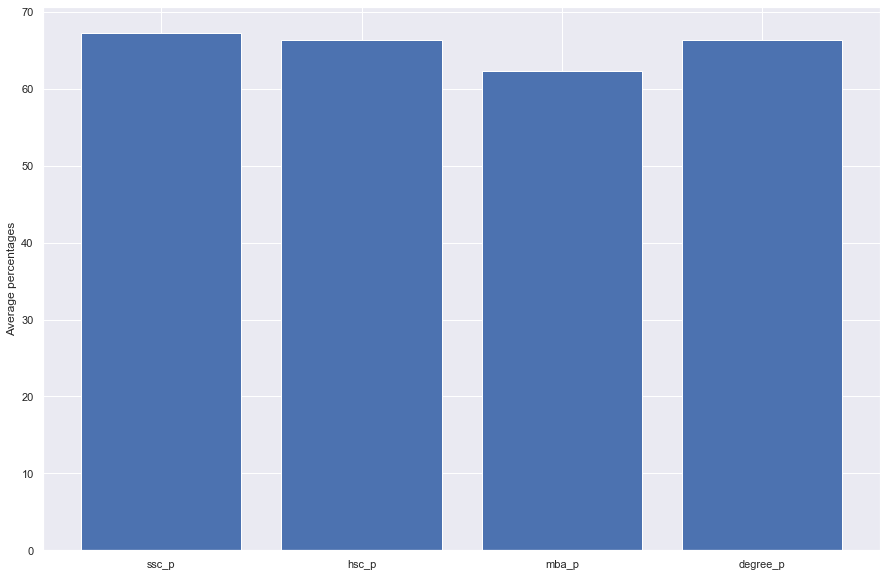

In [32]:
#average percentages
values = [(data['ssc_p'].mean()) , (data['hsc_p'].mean()) , (data['mba_p'].mean()) , (data['degree_p'].mean())]
fig, ax = plt.subplots(figsize = (15,10))
names = ['ssc_p','hsc_p','mba_p','degree_p']
ax.set_ylabel('Average percentages')
ax.bar(names,values)
plt.show()

In [33]:
#work experience based on gender
work_gender = data.groupby('workex')
work_gender.gender.value_counts()

workex  gender
No      M         87
        F         54
Yes     M         52
        F         22
Name: gender, dtype: int64

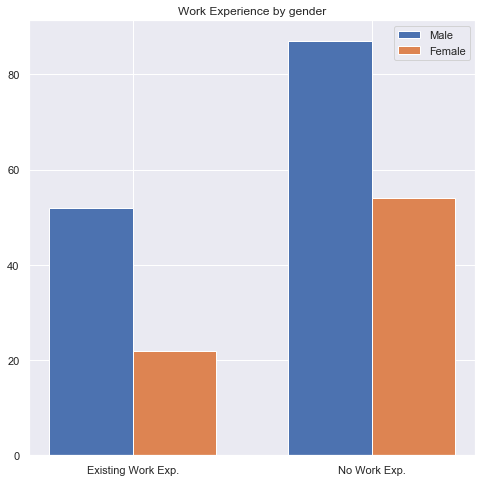

In [34]:
labels = ['Existing Work Exp.', 'No Work Exp.']
M = [52, 87]
F = [22, 54]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize = (8,8))
rects1 = ax.bar(x - width/2, M, width, label='Male')
rects2 = ax.bar(x + width/2, F, width, label='Female')
ax.set_title('Work Experience by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()